In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [229]:
df = pd.read_csv("strong.csv", index_col=None)

In [230]:
df["volume"] = df["weight"]*df["reps"]
parts = set(df["part"].values)

# 週ごとのボリューム

In [231]:
# ボリューム
def cal_vol(df):
    volumes = df.groupby("date").sum()
    volumes.index =pd.to_datetime(volumes.index)
    return volumes["volume"].resample("7D").sum()

# セット数
def cnt_rep(df):
    df["date"] = pd.to_datetime(df["date"])
    return df.set_index("date").resample("7D").sum()

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


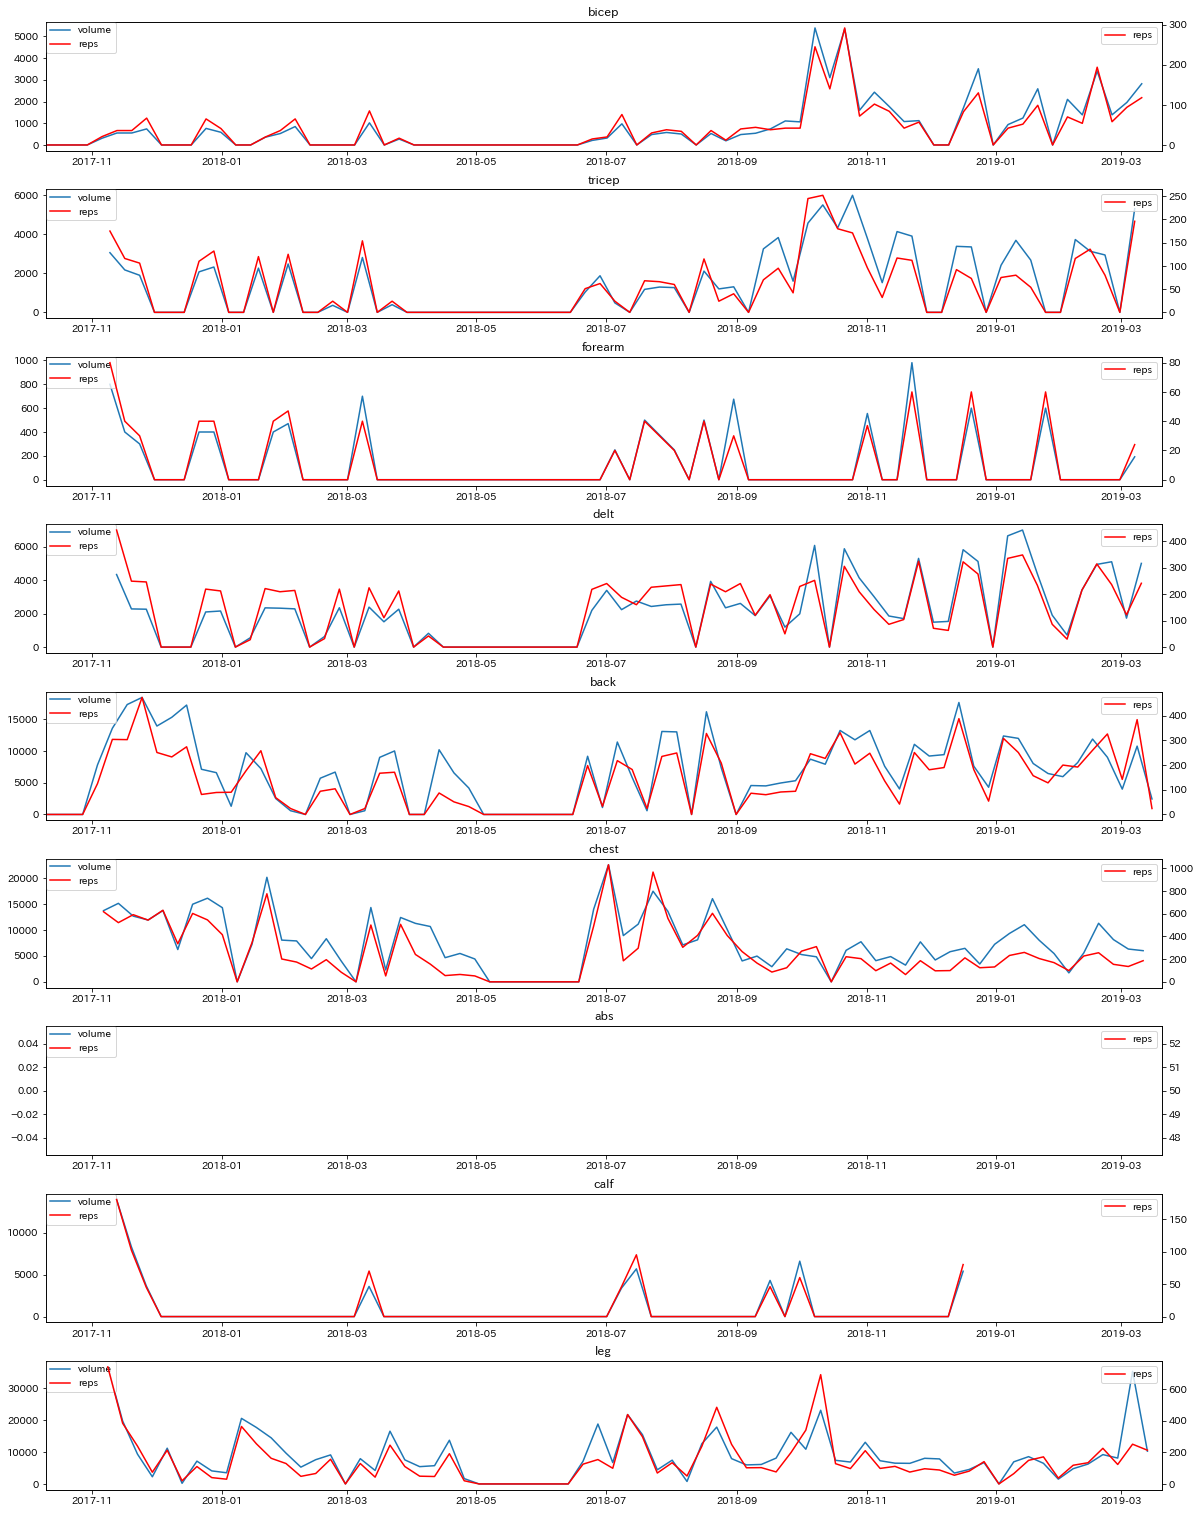

In [250]:
fig = plt.figure(figsize=(20, 3*len(parts)))    
fig.subplots_adjust(hspace=0.3)
for i, part in enumerate(parts):
    ax1 = fig.add_subplot(len(parts), 1, i+1)
    ax2 = ax1.twinx()
    d_vol = cal_vol(df.query('part == "{}"'.format(part)))
    d_rep = cnt_rep(df.query('part == "{}"'.format(part)))
    ax1.set_title(part)
    sns.lineplot(data=d_vol, ax=ax1, label="volume")
    sns.lineplot(data=d_rep["reps"], ax=ax2, color="r", label="reps")
    ax1.set_xlim(datetime.datetime(2017,10,10), datetime.datetime(2019,3,20)) # 範囲指定   
    handler1, label1 = ax1.get_legend_handles_labels()
    handler2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)



# 週ごとのボリュームと重量

## スクワット

In [234]:
#不要データ
df = df[df["reps"] != 0]

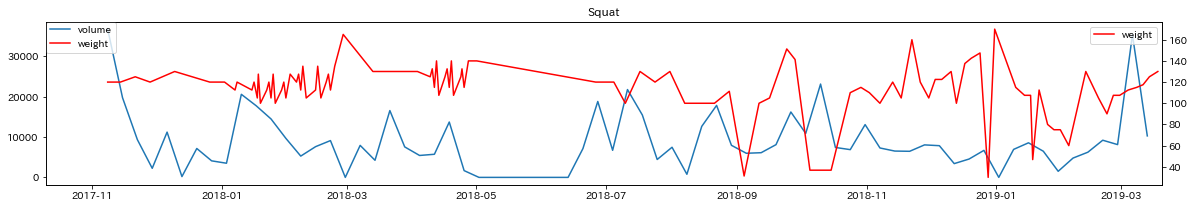

In [256]:
fig = plt.figure(figsize=(20, 3))    
ax = fig.add_subplot(1, 1, 1)

part = "leg"

d_vol = cal_vol(df.query('part == "{}"'.format(part)))
ax.set_title("Squat")
sns.lineplot(data=d_vol, ax=ax, label="volume")
ax.set_xlim(datetime.datetime(2017,10,10), datetime.datetime(2019,3,20))

ax2 = ax.twinx()
d_sq = df.query('menu.str.contains("Squat")', engine='python')
max_weight = d_sq.groupby("date").max()
max_weight.index =pd.to_datetime(max_weight.index)
max_weight
sns.lineplot(data=max_weight["weight"], ax=ax2, color="red", label="weight")

handler1, label1 = ax.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
    

## ベンチプレス

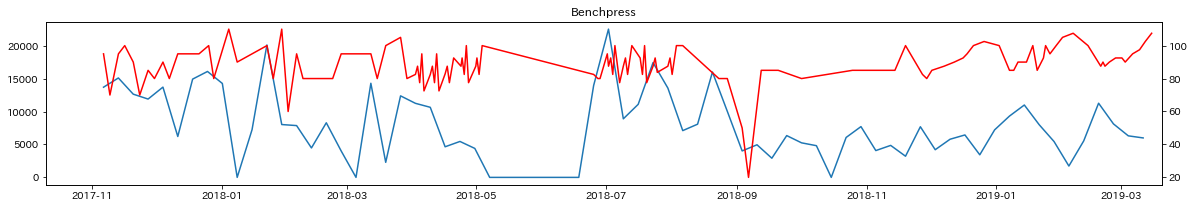

In [237]:
fig = plt.figure(figsize=(20, 3))    
ax = fig.add_subplot(1, 1, 1)

part = "chest"

d_vol = cal_vol(df.query('part == "{}"'.format(part)))
ax.set_title("Benchpress")
sns.lineplot(data=d_vol, ax=ax)
ax.set_xlim(datetime.datetime(2017,10,10), datetime.datetime(2019,3,20))

ax2 = ax.twinx()
d_sq = df.query('menu.str.contains("Bench Press \(Barbell\)")', engine='python')
max_weight = d_sq.groupby("date").max()
max_weight.index =pd.to_datetime(max_weight.index)
max_weight
sns.lineplot(data=max_weight["weight"], ax=ax2, color="red")

## デッドリフト

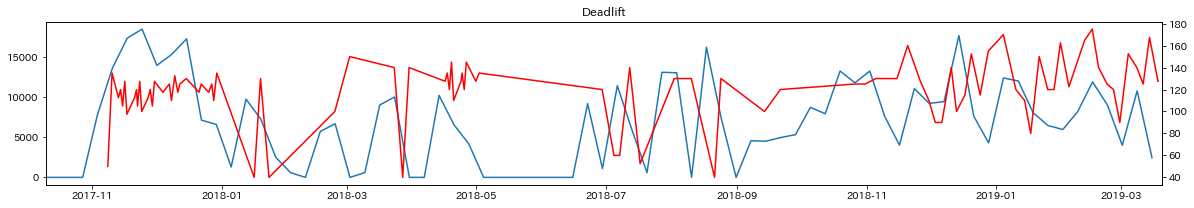

In [238]:
fig = plt.figure(figsize=(20, 3))    
ax = fig.add_subplot(1, 1, 1)

part = "back"

d_vol = cal_vol(df.query('part == "{}"'.format(part)))
ax.set_title("Deadlift")
sns.lineplot(data=d_vol, ax=ax)
ax.set_xlim(datetime.datetime(2017,10,10), datetime.datetime(2019,3,20))

ax2 = ax.twinx()
d_sq = df.query('menu.str.contains("Deadlift \(Barbell\)")', engine='python')
max_weight = d_sq.groupby("date").max()
max_weight.index =pd.to_datetime(max_weight.index)
max_weight
sns.lineplot(data=max_weight["weight"], ax=ax2, color="red")

## ショルダープレス

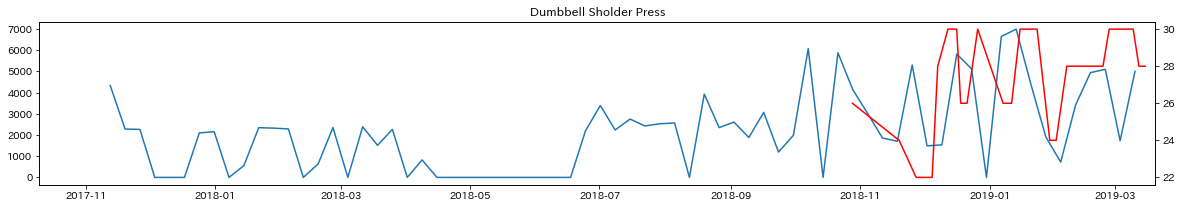

In [242]:
fig = plt.figure(figsize=(20, 3))    
ax = fig.add_subplot(1, 1, 1)

part = "delt"

d_vol = cal_vol(df.query('part == "{}"'.format(part)))
ax.set_title("Dumbbell Sholder Press")
sns.lineplot(data=d_vol, ax=ax)
ax.set_xlim(datetime.datetime(2017,10,10), datetime.datetime(2019,3,20))

ax2 = ax.twinx()
d_sq = df.query('menu.str.contains("Seated Overhead Press")', engine='python')
max_weight = d_sq.groupby("date").max()
max_weight.index =pd.to_datetime(max_weight.index)
max_weight
sns.lineplot(data=max_weight["weight"], ax=ax2, color="red")